### PyTorch로 Loss Function 구현하기

In [55]:
import numpy as np
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")

### Utility Function

정수 형태의 클래스 레이블을 원-핫(one-hot) 인코딩 형태로 변환 

원-핫 인코딩은 모델이 클래스 간의 수치적 차이를 오해하지 않도록 해줌 (예: 클래스 3이 클래스 1보다 "더 좋다"는 식의 오해 방지).

In [56]:
def convertinteger2onehot(ground_truth_integer, n_class = 10):
    batch_size = len(ground_truth_integer)
    ground_truth_onehot = torch.zeros((batch_size, n_class))
    ground_truth_onehot[torch.arange(batch_size), ground_truth_integer] = 1
    
    return ground_truth_onehot

In [57]:
convertinteger2onehot((1,), 10)

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Loss Function for Regression

- MSE Loss (nn.MSELoss)
- MAE Loss (nn.L1Loss)
- Huber Loss (nn.HuberLoss)

#### Generating Regression Data

In [58]:
batch_size = 16
def generate_regression(batch_size = 16):
    return torch.rand(batch_size), torch.rand(batch_size)

In [59]:
predicted, ground_truth = generate_regression()

print(predicted.shape, ground_truth.shape)

torch.Size([16]) torch.Size([16])


#### MSE Loss

In [60]:
loss = nn.MSELoss(reduction = "mean")
loss(predicted, ground_truth)

tensor(0.1328)

In [61]:
loss = nn.MSELoss(reduction = "none")
loss(predicted, ground_truth)

tensor([2.9748e-01, 1.2713e-01, 2.0390e-01, 2.4141e-03, 5.0619e-02, 1.9921e-01,
        1.1371e-01, 1.9273e-02, 1.0264e-04, 4.2733e-01, 7.1315e-02, 3.2008e-02,
        1.7015e-03, 5.6209e-01, 3.3003e-03, 1.3951e-02])

#### MAE Loss

In [62]:
loss = nn.L1Loss(reduction = "mean")
loss(predicted, ground_truth)

tensor(0.2891)

In [63]:
loss = nn.L1Loss(reduction = "none")
loss(predicted, ground_truth)

tensor([0.5454, 0.3566, 0.4515, 0.0491, 0.2250, 0.4463, 0.3372, 0.1388, 0.0101,
        0.6537, 0.2670, 0.1789, 0.0412, 0.7497, 0.0574, 0.1181])

#### Huber Loss

In [64]:
loss = nn.HuberLoss(reduction = "mean")
loss(predicted, ground_truth)

tensor(0.0664)

In [65]:
loss = nn.HuberLoss(reduction = "none")
loss(predicted, ground_truth)

tensor([1.4874e-01, 6.3567e-02, 1.0195e-01, 1.2070e-03, 2.5310e-02, 9.9607e-02,
        5.6856e-02, 9.6366e-03, 5.1319e-05, 2.1367e-01, 3.5658e-02, 1.6004e-02,
        8.5073e-04, 2.8104e-01, 1.6502e-03, 6.9755e-03])

### Plot으로 각각의 Loss 비교

In [66]:
N = 100
y_pred = np.linspace(-3,3, N)
y_pred = torch.Tensor(y_pred)
y_true = torch.zeros(N)

In [67]:
l1_loss = nn.L1Loss(reduction= "none")
l1_list = l1_loss(y_pred, y_true)

mse_loss = nn.MSELoss(reduction= "none")
mse_list = mse_loss(y_pred, y_true)

huber_loss = nn.HuberLoss(reduction= "none")
huber_list = huber_loss(y_pred, y_true)

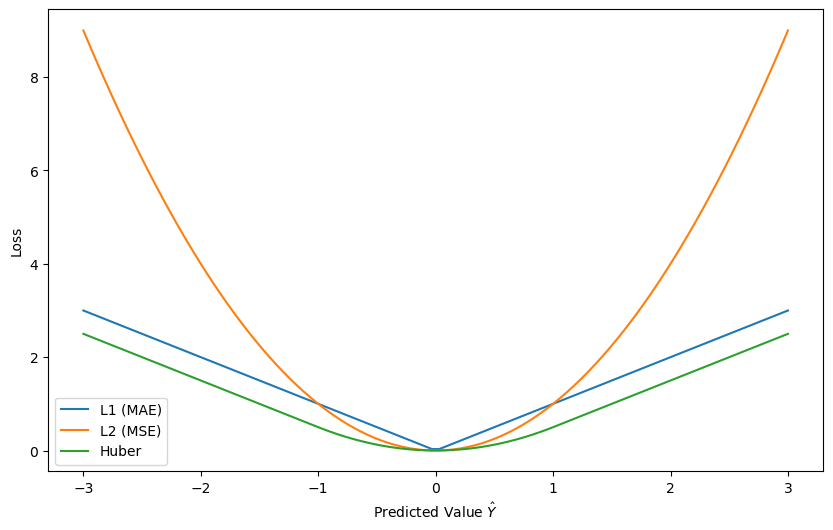

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred, l1_list.numpy(), label = "L1 (MAE)")
plt.plot(y_pred, mse_list.numpy(), label = "L2 (MSE)")
plt.plot(y_pred, huber_list.numpy(), label = "Huber")
plt.legend()
plt.xlabel(r"Predicted Value $\hat{Y}$")
plt.ylabel("Loss")
plt.show()

### Loss Function for Classification

- 1. Cross Entropy Loss

- 2. L1 Loss (nn.L1Loss)
- 3. KL Divergence Loss (nn.KLDivLoss)

#### Generating Classification Data

In [69]:
batch_size = 16
n_class = 10

def generate_classification(batch_size = 16, n_class = 10):
    pred = torch.nn.Softmax()(torch.rand(batch_size, n_class))
    gt = torch.argmax(torch.rand(batch_size, n_class), dim = 1)
    
    return pred, gt

In [70]:
batch_size = 16
n_class = 10

def generate_onehot(batch_size = 16, n_class = 10):
    pred = torch.nn.Softmax()(torch.rand(batch_size, n_class))
    gt = torch.rand(batch_size, n_class)
    gt = torch.Tensor(gt == torch.max(gt, dim = 1, keepdim= True)[0]).float()

    return pred, gt

In [71]:
predicted, ground_truth = generate_classification()

print(predicted.shape, ground_truth.shape)

torch.Size([16, 10]) torch.Size([16])


#### Cross Entropy Loss

In [72]:
loss = nn.CrossEntropyLoss(reduction="mean")
loss(predicted, ground_truth)

tensor(2.3088)

##### 직접 구현하기

In [73]:
def CELoss(predicted, ground_truth):
    loss = 0.
    exp_pred = torch.exp(predicted)
    for batch_i in range(len(predicted)):

        for j in range(len(predicted[0])):
            if j == ground_truth[batch_i]:
                loss = loss + torch.log(exp_pred[batch_i][j] / torch.sum(exp_pred, axis = 1)[batch_i])

    return -loss / len(predicted) 

In [74]:
CELoss(predicted, ground_truth)

tensor(2.3088)

#### L1 Loss

ground_truth가 one_hot일 때 사용 가능하다

In [75]:
predicted, ground_truth = generate_onehot()

In [76]:
loss = nn.L1Loss(reduction= "mean")
loss(predicted, ground_truth)

tensor(0.1799)

#### KL Divergence

In [77]:
predicted, ground_truth = generate_onehot()

In [78]:
loss = nn.KLDivLoss(reduction= "mean")
loss(predicted, ground_truth)

tensor(-0.0089)

#### Plot으로 각 Loss 비교하기

In [79]:
def ce_loss(y, y_true):
    return -(y_true * np.log(y) + (1-y_true) * np.log(1-y))


def l1_loss(y, y_true):
    return np.abs(y - y_true)


def Kl_loss(y, y_true):
    return (y_true * np.log(y_true) - y_true * np.log(y) + (1 - y_true) * np.log(1 - y_true) - (1 - y_true) * np.log(1 - y))

In [80]:
def plot_graph(y_true = 0.99):
    x_values = np.linspace(0.01, 0.99, 50)

    ce = [ce_loss(i, y_true) for i in x_values]
    l1 = [l1_loss(i, y_true) for i in x_values]
    kl = [Kl_loss(i, y_true) for i in x_values]

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, ce, label = "Cross Entropy")
    plt.plot(x_values, l1, label = "L1 (MAE)")
    plt.plot(x_values, kl, label = "KL Divergence")
    plt.legend()
    plt.xlabel(r"Predicted Value $\hat{Y}$")
    plt.ylabel("Loss")
    plt.title("y true = %.2f" % y_true )
    plt.show()


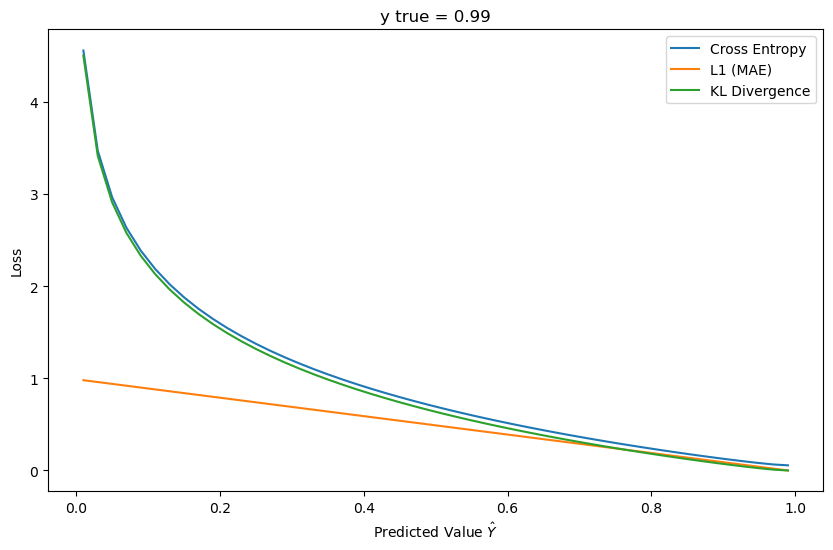

In [81]:
plot_graph(0.99)

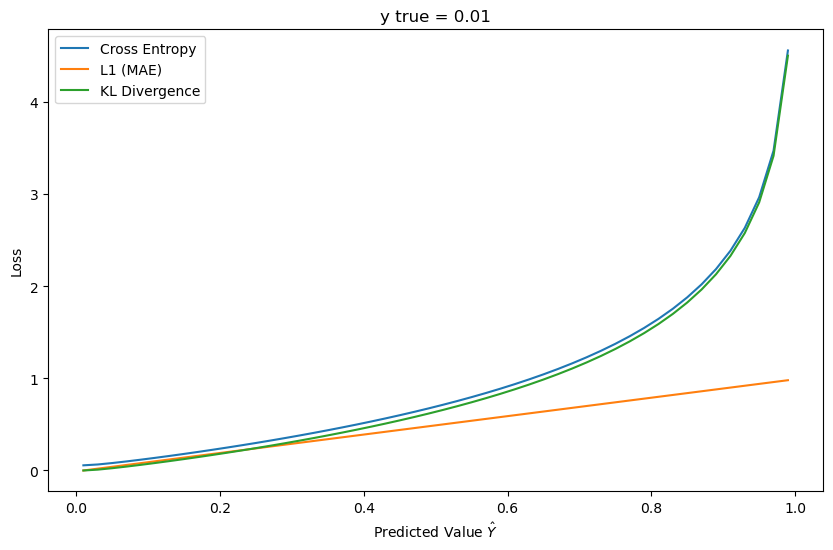

In [82]:
plot_graph(0.01)

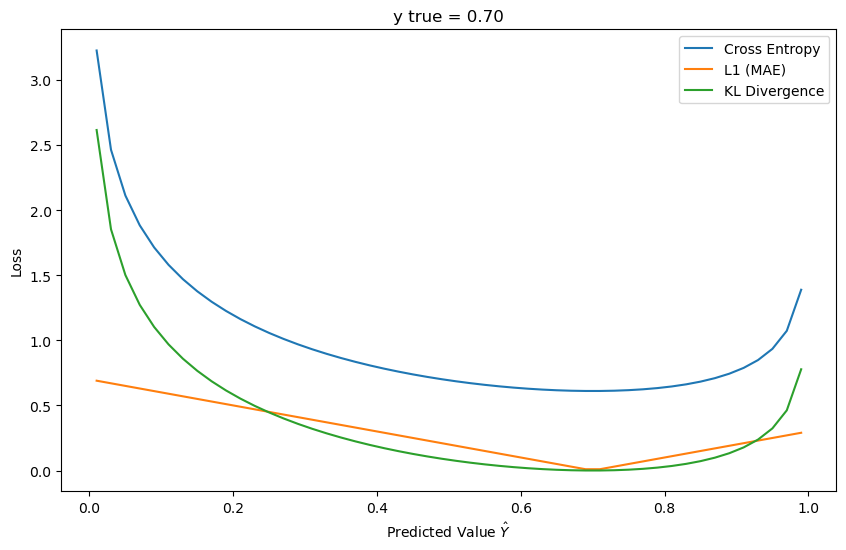

In [83]:
plot_graph(0.7)

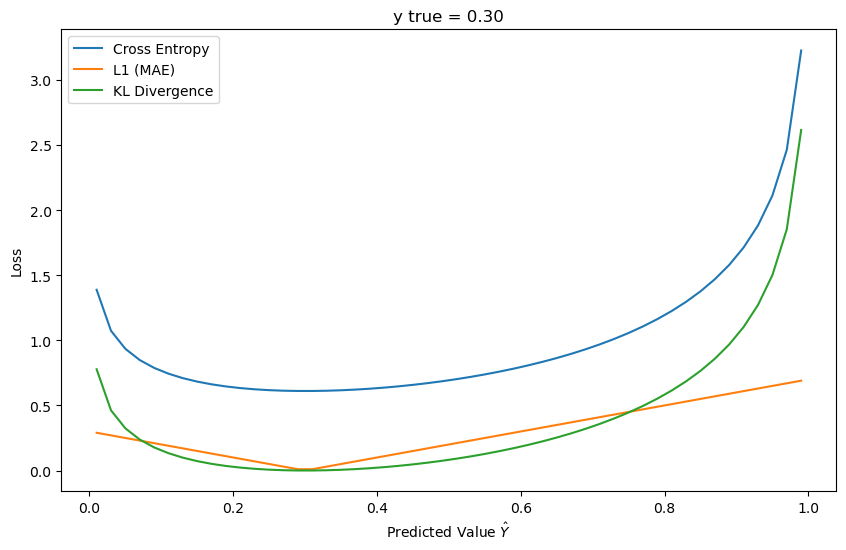

In [84]:
plot_graph(0.3)